## CASK FR1 Correct Rate

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
from accuracy import graph_cumulative_acc, read_and_record, graph_group_stats
from intervals import perform_T_test
from path import fr1_ctrl_path, fr1_cask_path, fr1_ctrl_sheets, fr1_cask_sheets
from path import fr1_ctrl_cohorts, fr1_cask_cohorts
print(f'There are {len(fr1_ctrl_cohorts)} cohorts in control and {len(fr1_cask_cohorts)} in CASK')

export_root = '../export/Figure 1/Supplementary 1'
ctrl_ending_corr = []
cask_ending_corr = []
ctrl_learned_time = []
cask_learned_time = []
ctrl_acc_dict = {}
cask_acc_dict = {}

There are 4 cohorts in control and 4 in CASK


## Control Group

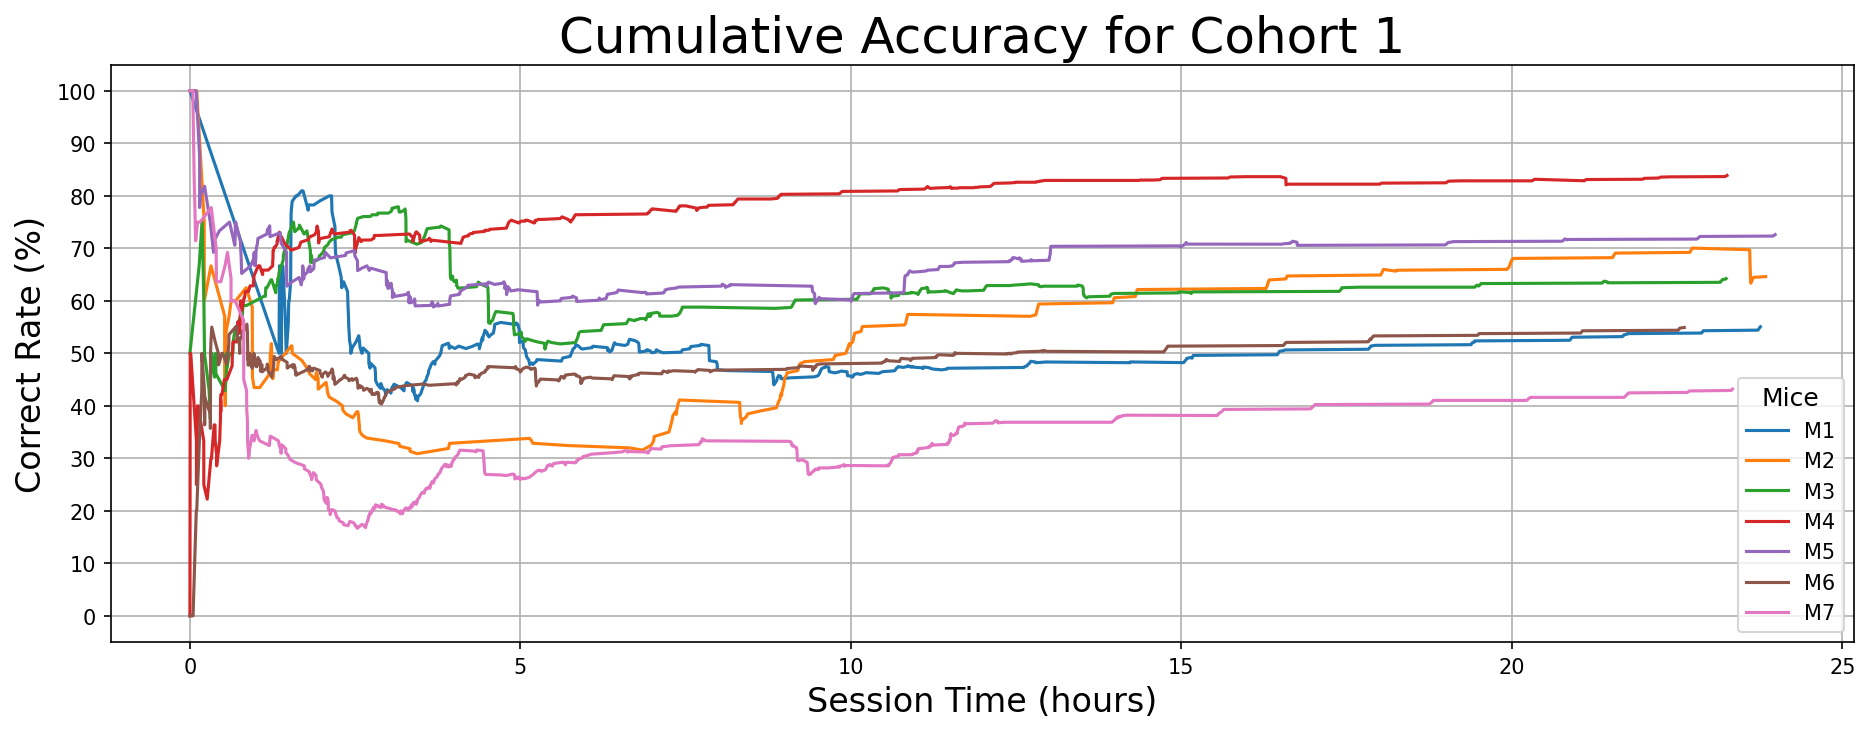

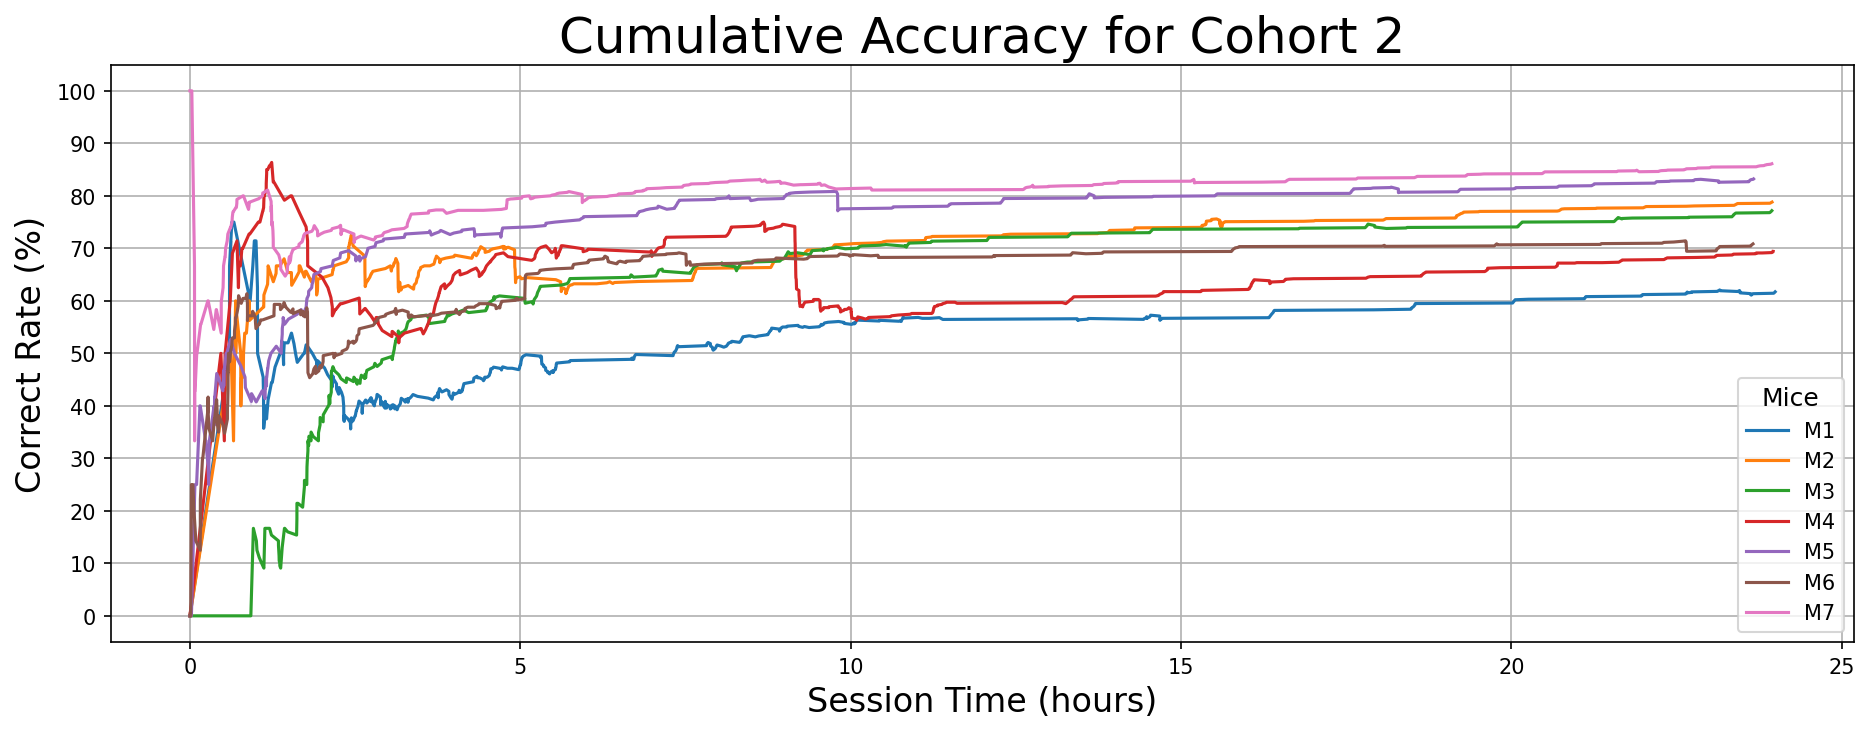

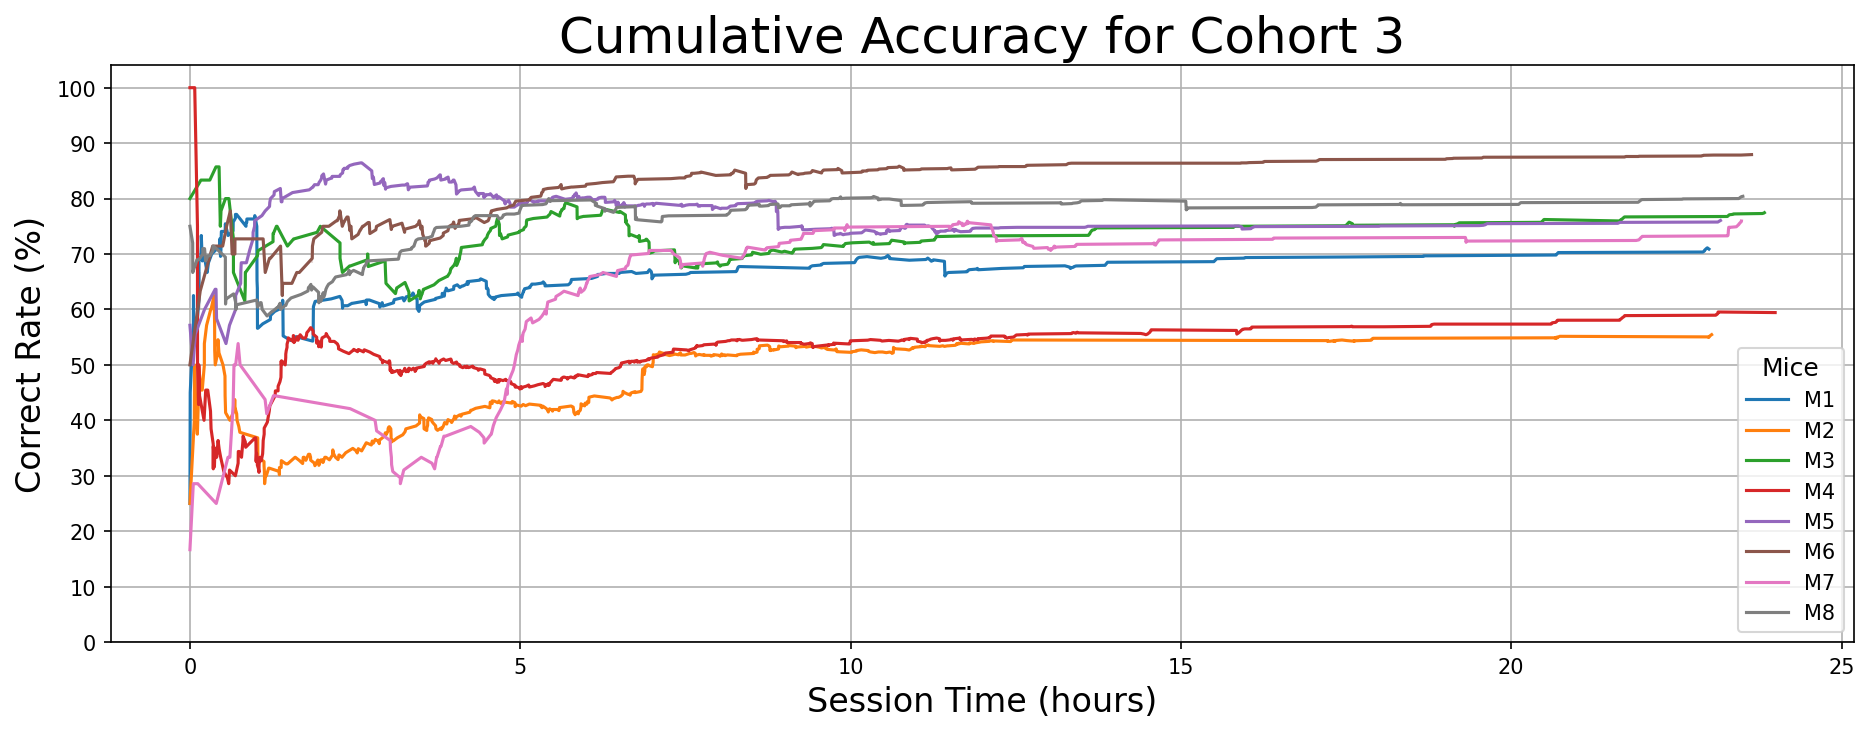

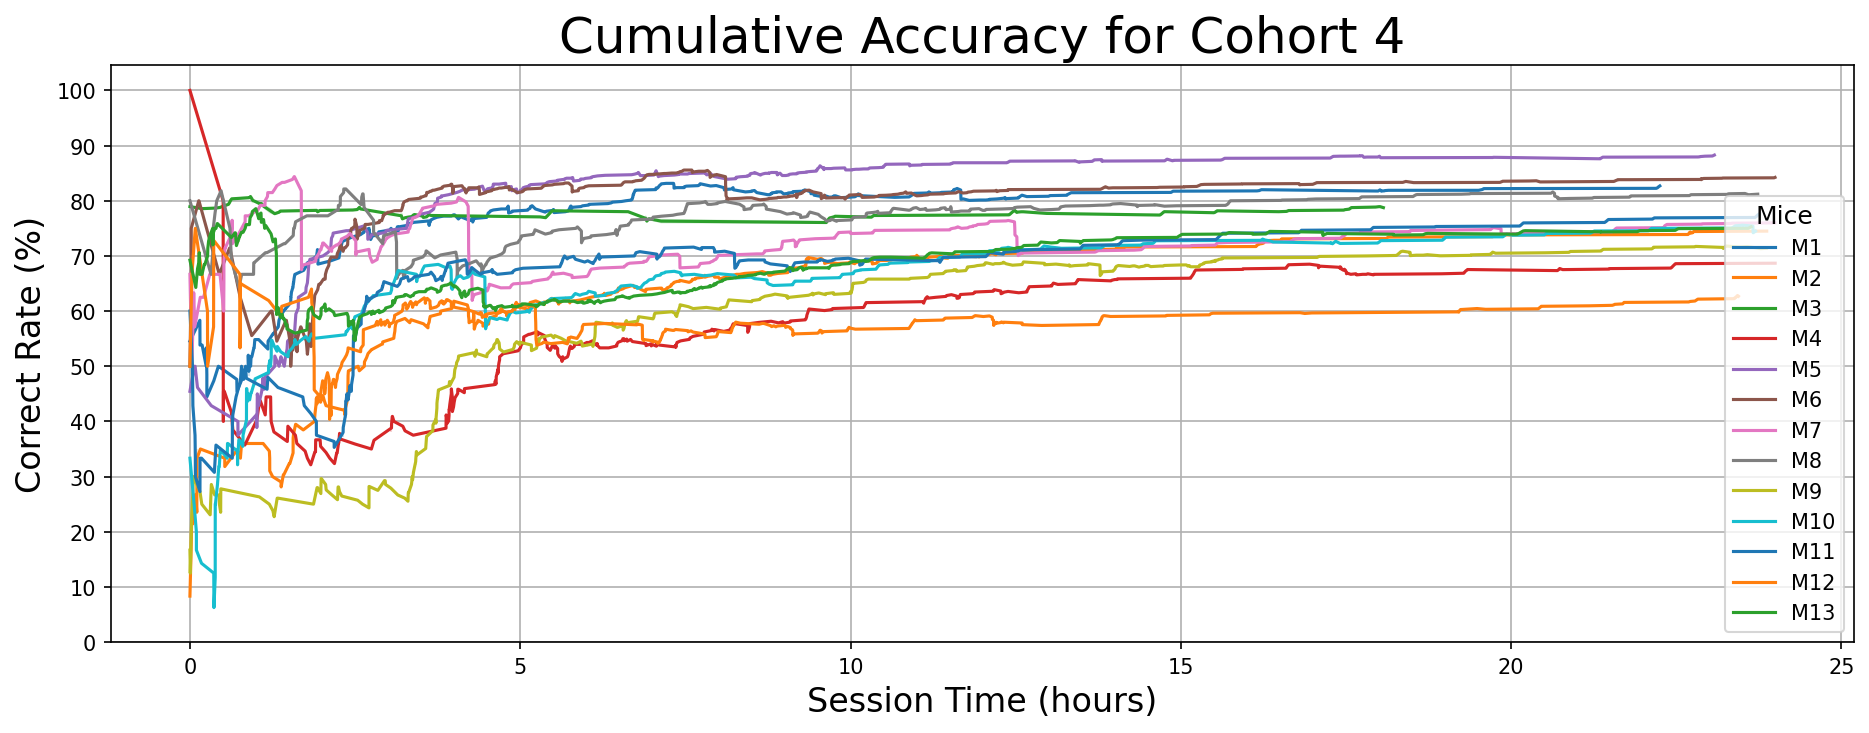

In [2]:
group_data = []

for idx, cohort in enumerate(fr1_ctrl_cohorts):
    for sheet in cohort:
        data = read_and_record(path=fr1_ctrl_path, sheet=sheet, 
                            ending_corr=ctrl_ending_corr, 
                            learned_time=ctrl_learned_time,
                            acc_dict=ctrl_acc_dict)
        group_data.append(data)
    graph_cumulative_acc(group_data, idx+1, export_path=os.path.join(export_root, f'ctrl_cohort_{idx+1}.svg'))
    group_data = []

## CASK Group

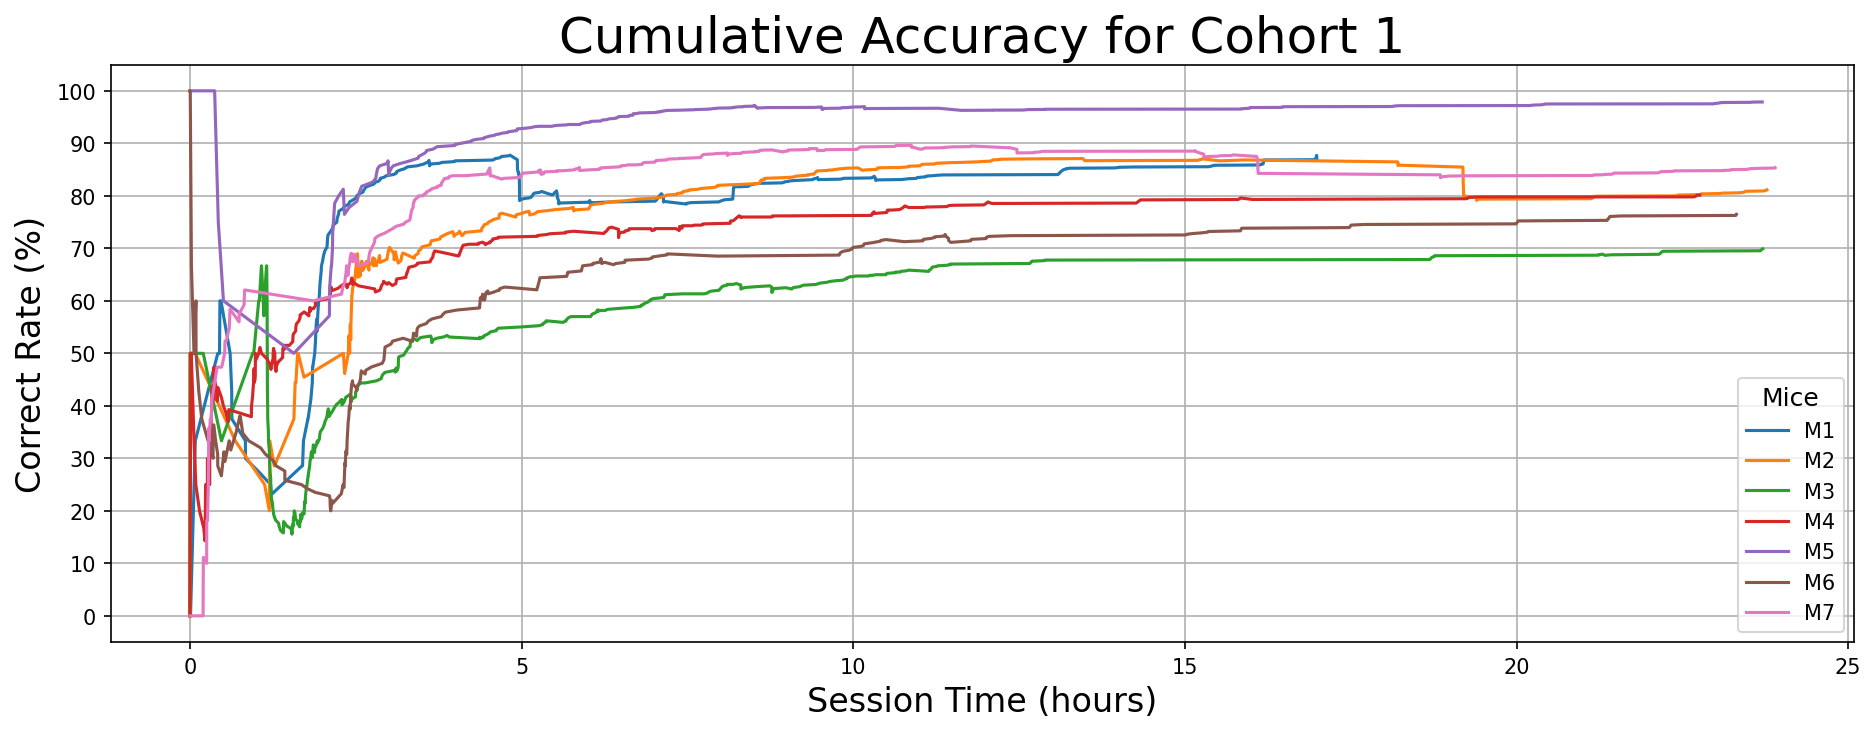

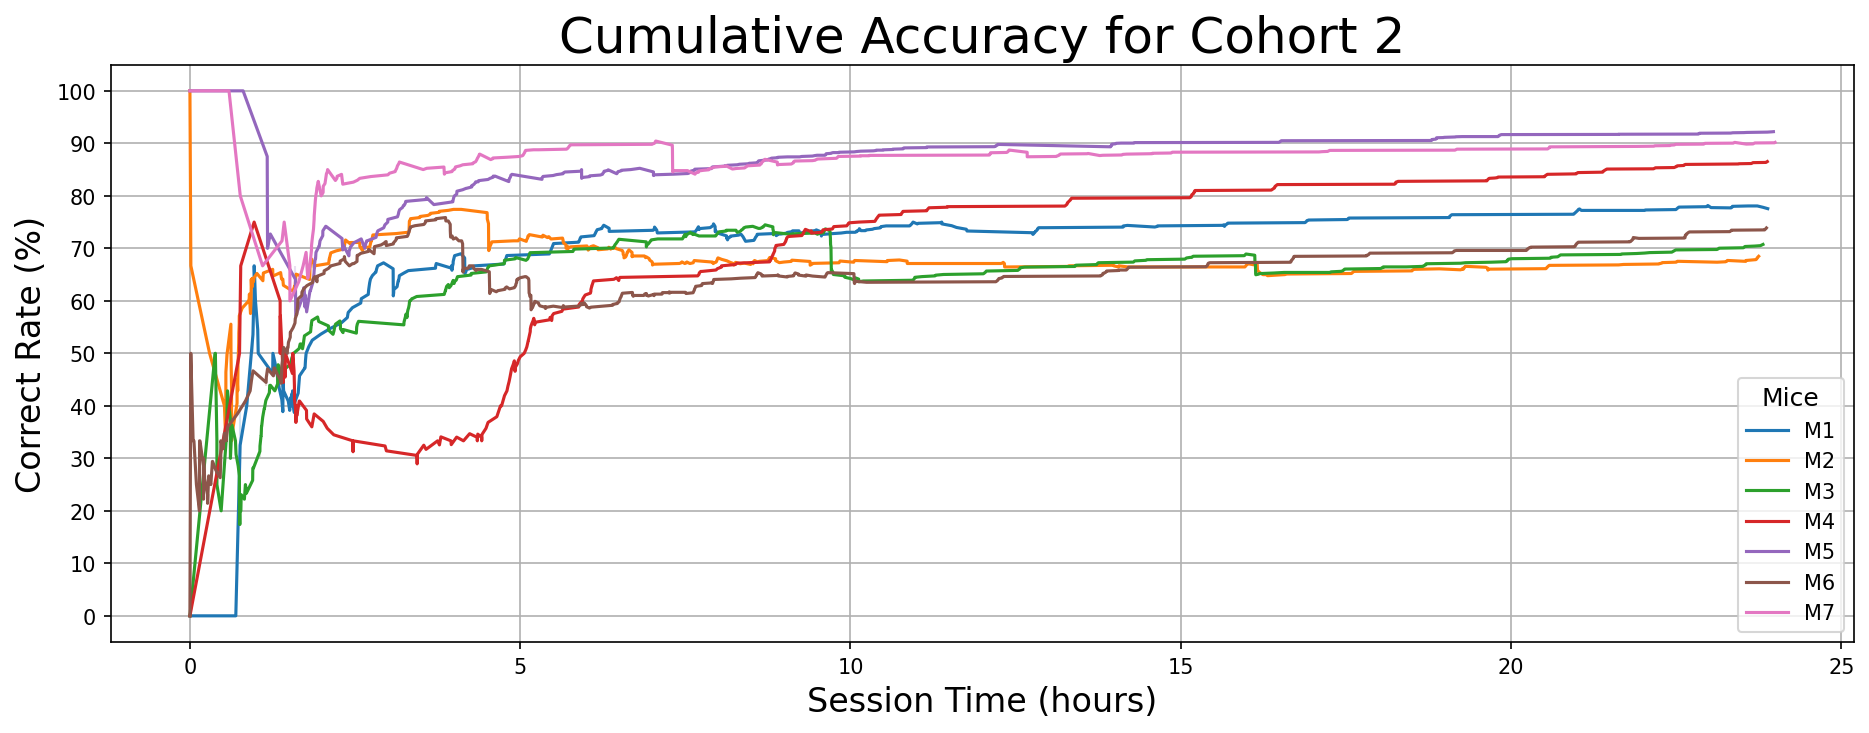

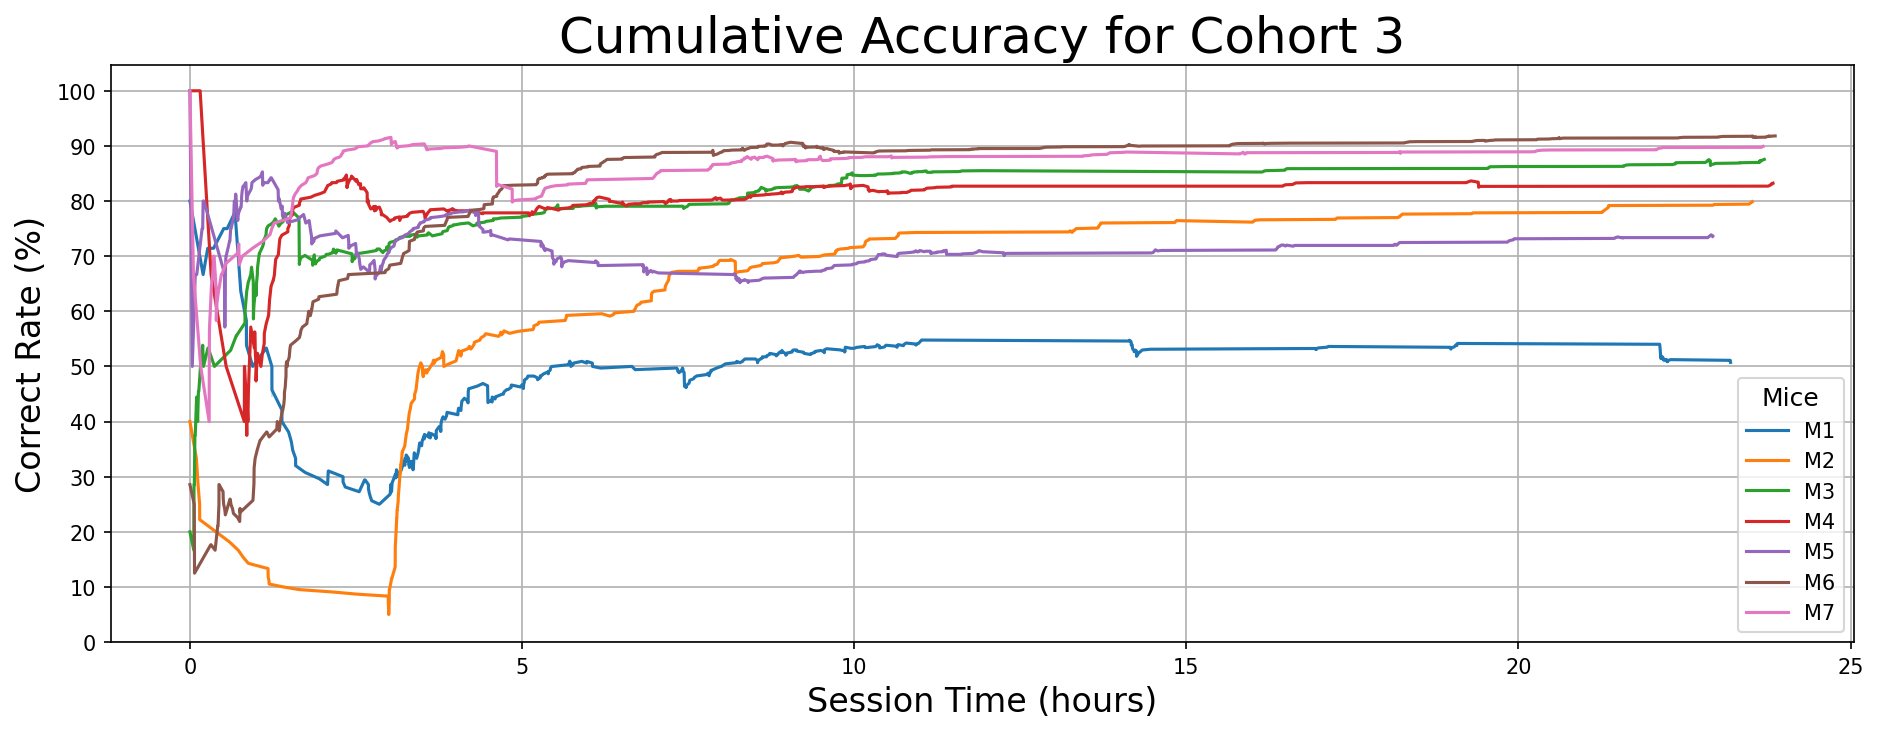

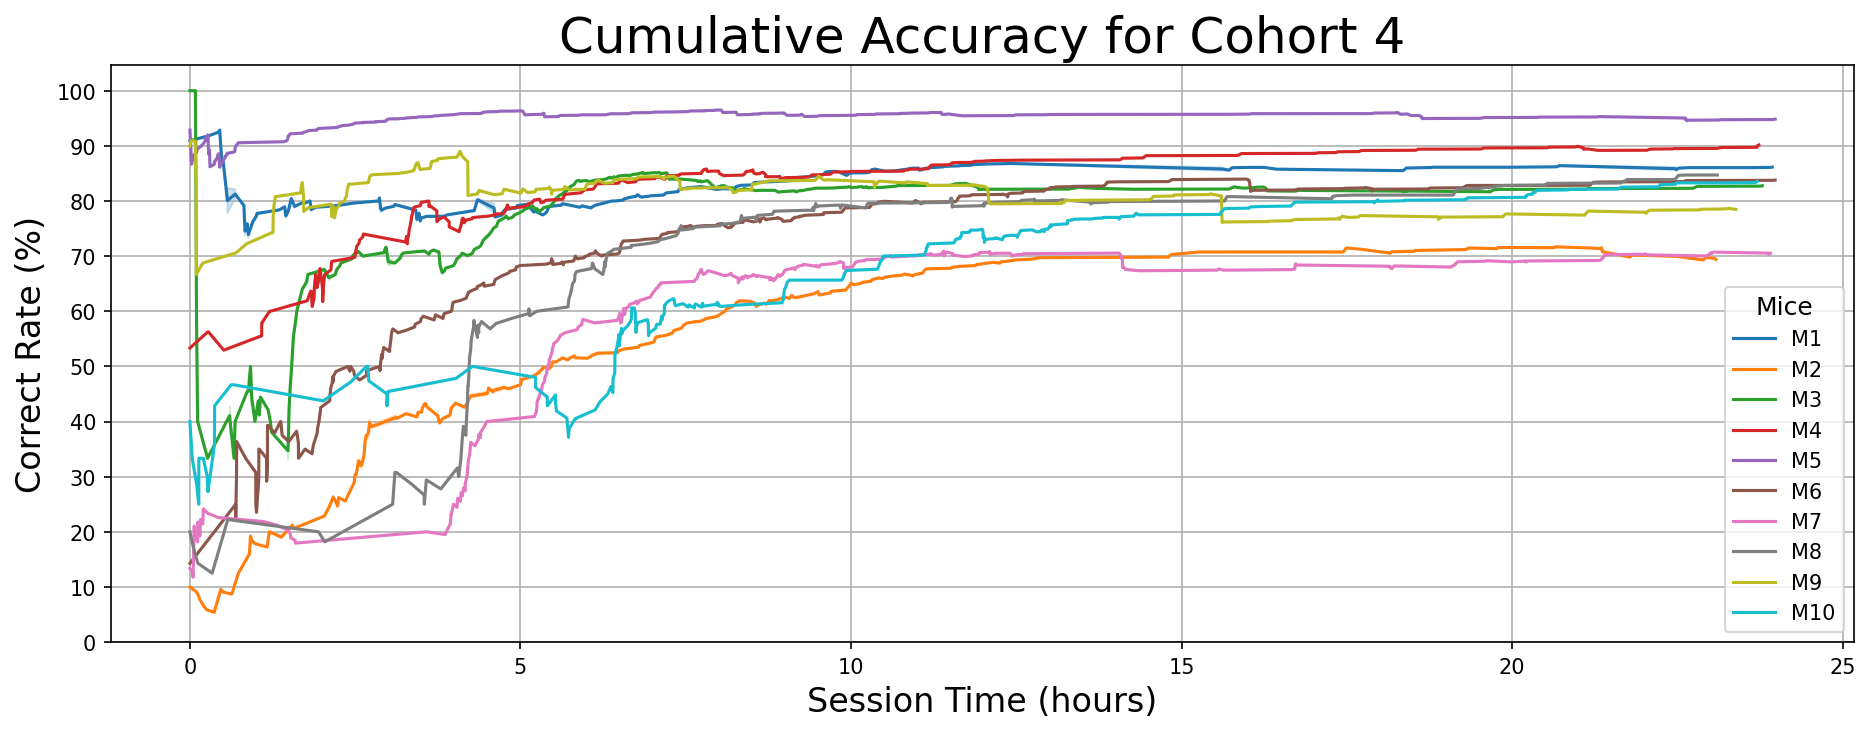

In [3]:
group_data = []

for idx, cohort in enumerate(fr1_cask_cohorts):
    for sheet in cohort:
        data = read_and_record(path=fr1_cask_path, sheet=sheet, 
                            ending_corr=cask_ending_corr, 
                            learned_time=cask_learned_time,
                            acc_dict=cask_acc_dict)
        group_data.append(data)
    graph_cumulative_acc(group_data, idx+1, export_path=os.path.join(export_root, f'cask_cohort_{idx+1}.svg'))
    group_data = []

### Analysis

#### Time need to reach 80% for 2 cont. hours

In [5]:
perform_T_test(ctrl_learned_time, cask_learned_time, test_side='two-sided')

P Value is  0.0054196329085916635
There is a significant difference between the two groups.


Control Size: 35
CASK Size: 31
Control Average: 4.216007936507936
CASK Average: 1.9930017921146952
Control Standard Deviation: 3.8129118341832524
CASK Standard Deviation: 2.105624149204395


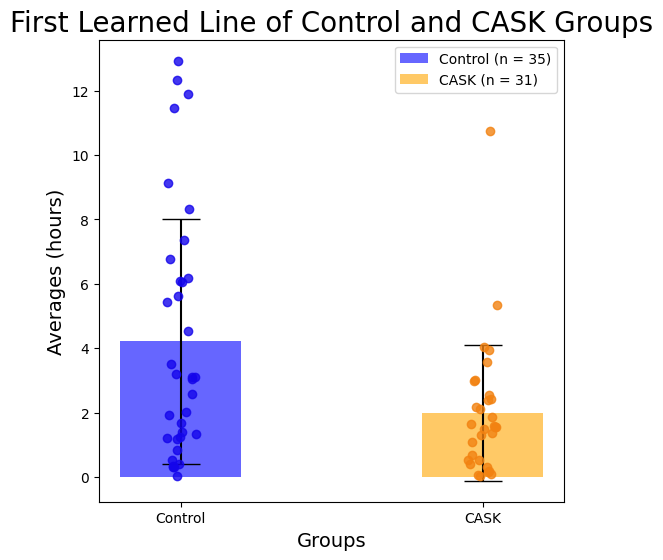

In [4]:
graph_group_stats(ctrl=ctrl_learned_time, exp=cask_learned_time, exp_name='CASK', stats_name='First Learned Line', unit='hours',
                  export_path=os.path.join(export_root, '..', 'FR1_FirstLearnedLine_barplot.svg'))

In [5]:
import pickle
pickle.dump((ctrl_acc_dict, cask_acc_dict), open('../data/ctrl_fr1_acc.pkl', 'wb'))

#### Ctrl/Cask Ending/Overall Correct Rate

In [6]:
perform_T_test(ctrl_ending_corr, cask_ending_corr, test_side='two-sided')

P Value is  0.001223590547289425
There is a significant difference between the two groups.


Control Size: 35
CASK Size: 31
Control Average: 72.74410297106277
CASK Average: 81.25143023245667
Control Standard Deviation: 10.577498947643644
CASK Standard Deviation: 9.738596577209124


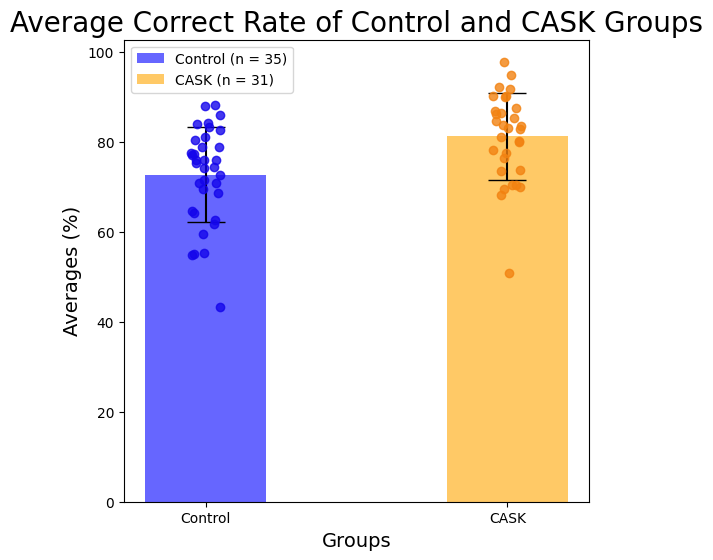

In [7]:
graph_group_stats(ctrl=ctrl_ending_corr, exp=cask_ending_corr, exp_name='CASK', stats_name='Average Correct Rate', unit='%',
                  export_path=os.path.join(export_root, '..', 'FR1_accuracy_barplot.svg'))

In [11]:
from preprocessing import find_dispense_time_one_day

In [12]:
ctrl_dispense = {}
cask_dispense = {}
for sheet in fr1_ctrl_sheets:
    ctrl_dispense[sheet] = find_dispense_time_one_day(path=fr1_ctrl_path, sheet=sheet)
for sheet in fr1_cask_sheets:
    cask_dispense[sheet] = find_dispense_time_one_day(fr1_cask_path, sheet)

In [13]:
with open('../stats/fr1_ctrl_dispense.txt', 'w') as f:
    f.write(f'Mouse\tDispense Time (minute)\n')
    for key,val in ctrl_dispense.items():
        f.write(f'{key}\t{val}\n')

In [14]:
with open('../stats/fr1_cask_dispense.txt', 'w') as f:
    f.write(f'Mouse\tDispense Time (minute)\n')
    for key,val in cask_dispense.items():
        f.write(f'{key}\t{val}\n')

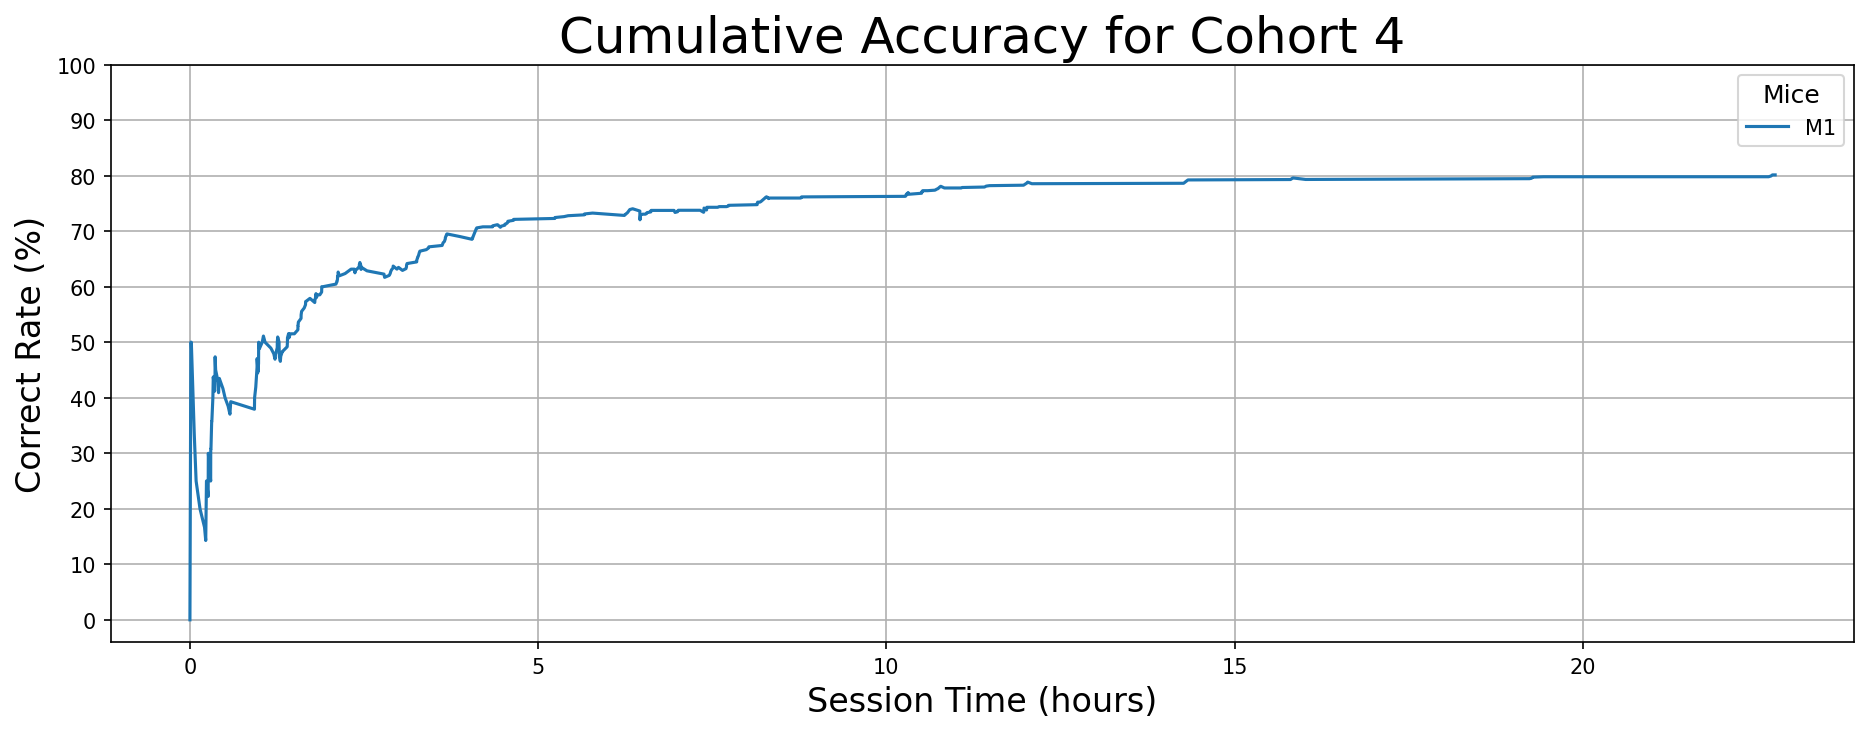

In [14]:
# example figure plotting
data = read_and_record(path=fr1_cask_path, sheet=fr1_cask_cohorts[0][3], 
                    ending_corr=cask_ending_corr, 
                    learned_time=cask_learned_time,
                    acc_dict=cask_acc_dict)
graph_cumulative_acc([data], idx+1, export_path=os.path.join(export_root, '..', f'accuracy_sample.svg'))